In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [2]:
#Import data

#Dataset #1
games_details = pd.read_csv ("./data/games_details.csv")
games = pd.read_csv ("./data/games.csv")
players = pd.read_csv ("./data/players.csv")
ranking = pd.read_csv ("./data/ranking.csv")
teams = pd.read_csv ("./data/teams.csv")

#Dataset #2
players_data = pd.read_csv ("./data/all_seasons.csv")

#Dataset #3
draft_data = pd.read_csv ("./data/NBA_Draft_1980_2017.tsv", sep = '\t')

C:\Users\Raghuram\AppData\Local\Temp\ipykernel_3900\3805560387.py:4: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  games_details = pd.read_csv ("./data/games_details.csv")


In [3]:
players_data

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12300,12300,Markieff Morris,MIA,32.0,205.74,111.130040,Kansas,USA,2011,1,...,7.6,2.6,1.4,4.5,0.059,0.089,0.197,0.547,0.116,2021-22
12301,12301,Markelle Fultz,ORL,24.0,193.04,94.800728,Washington,USA,2017,1,...,10.8,2.7,5.5,-5.3,0.010,0.116,0.265,0.517,0.448,2021-22
12302,12302,Marcus Smart,BOS,28.0,193.04,99.790240,Oklahoma State,USA,2014,1,...,12.1,3.8,5.9,9.3,0.018,0.093,0.179,0.540,0.245,2021-22
12303,12303,Marcus Garrett,MIA,23.0,195.58,92.986360,Kansas,USA,Undrafted,Undrafted,...,1.1,1.9,0.6,5.8,0.072,0.108,0.086,0.280,0.069,2021-22


In [4]:
players_data = players_data[['draft_round', 'player_height', 'player_weight', 'pts', 'ast', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct']]
players_data = players_data.drop(players_data[players_data.draft_round == 'Undrafted'].index)#Remove undrafted
players_data['draft_round'] = pd.to_numeric(players_data['draft_round'])

<AxesSubplot:>

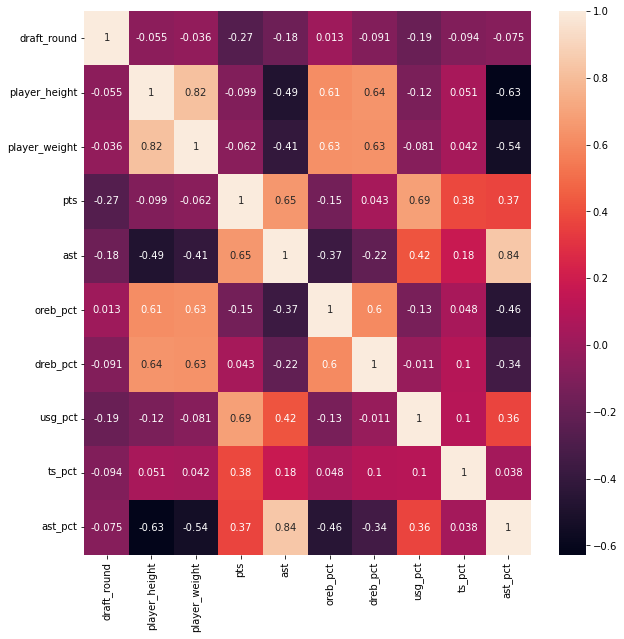

In [5]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(players_data.corr(), annot=True)

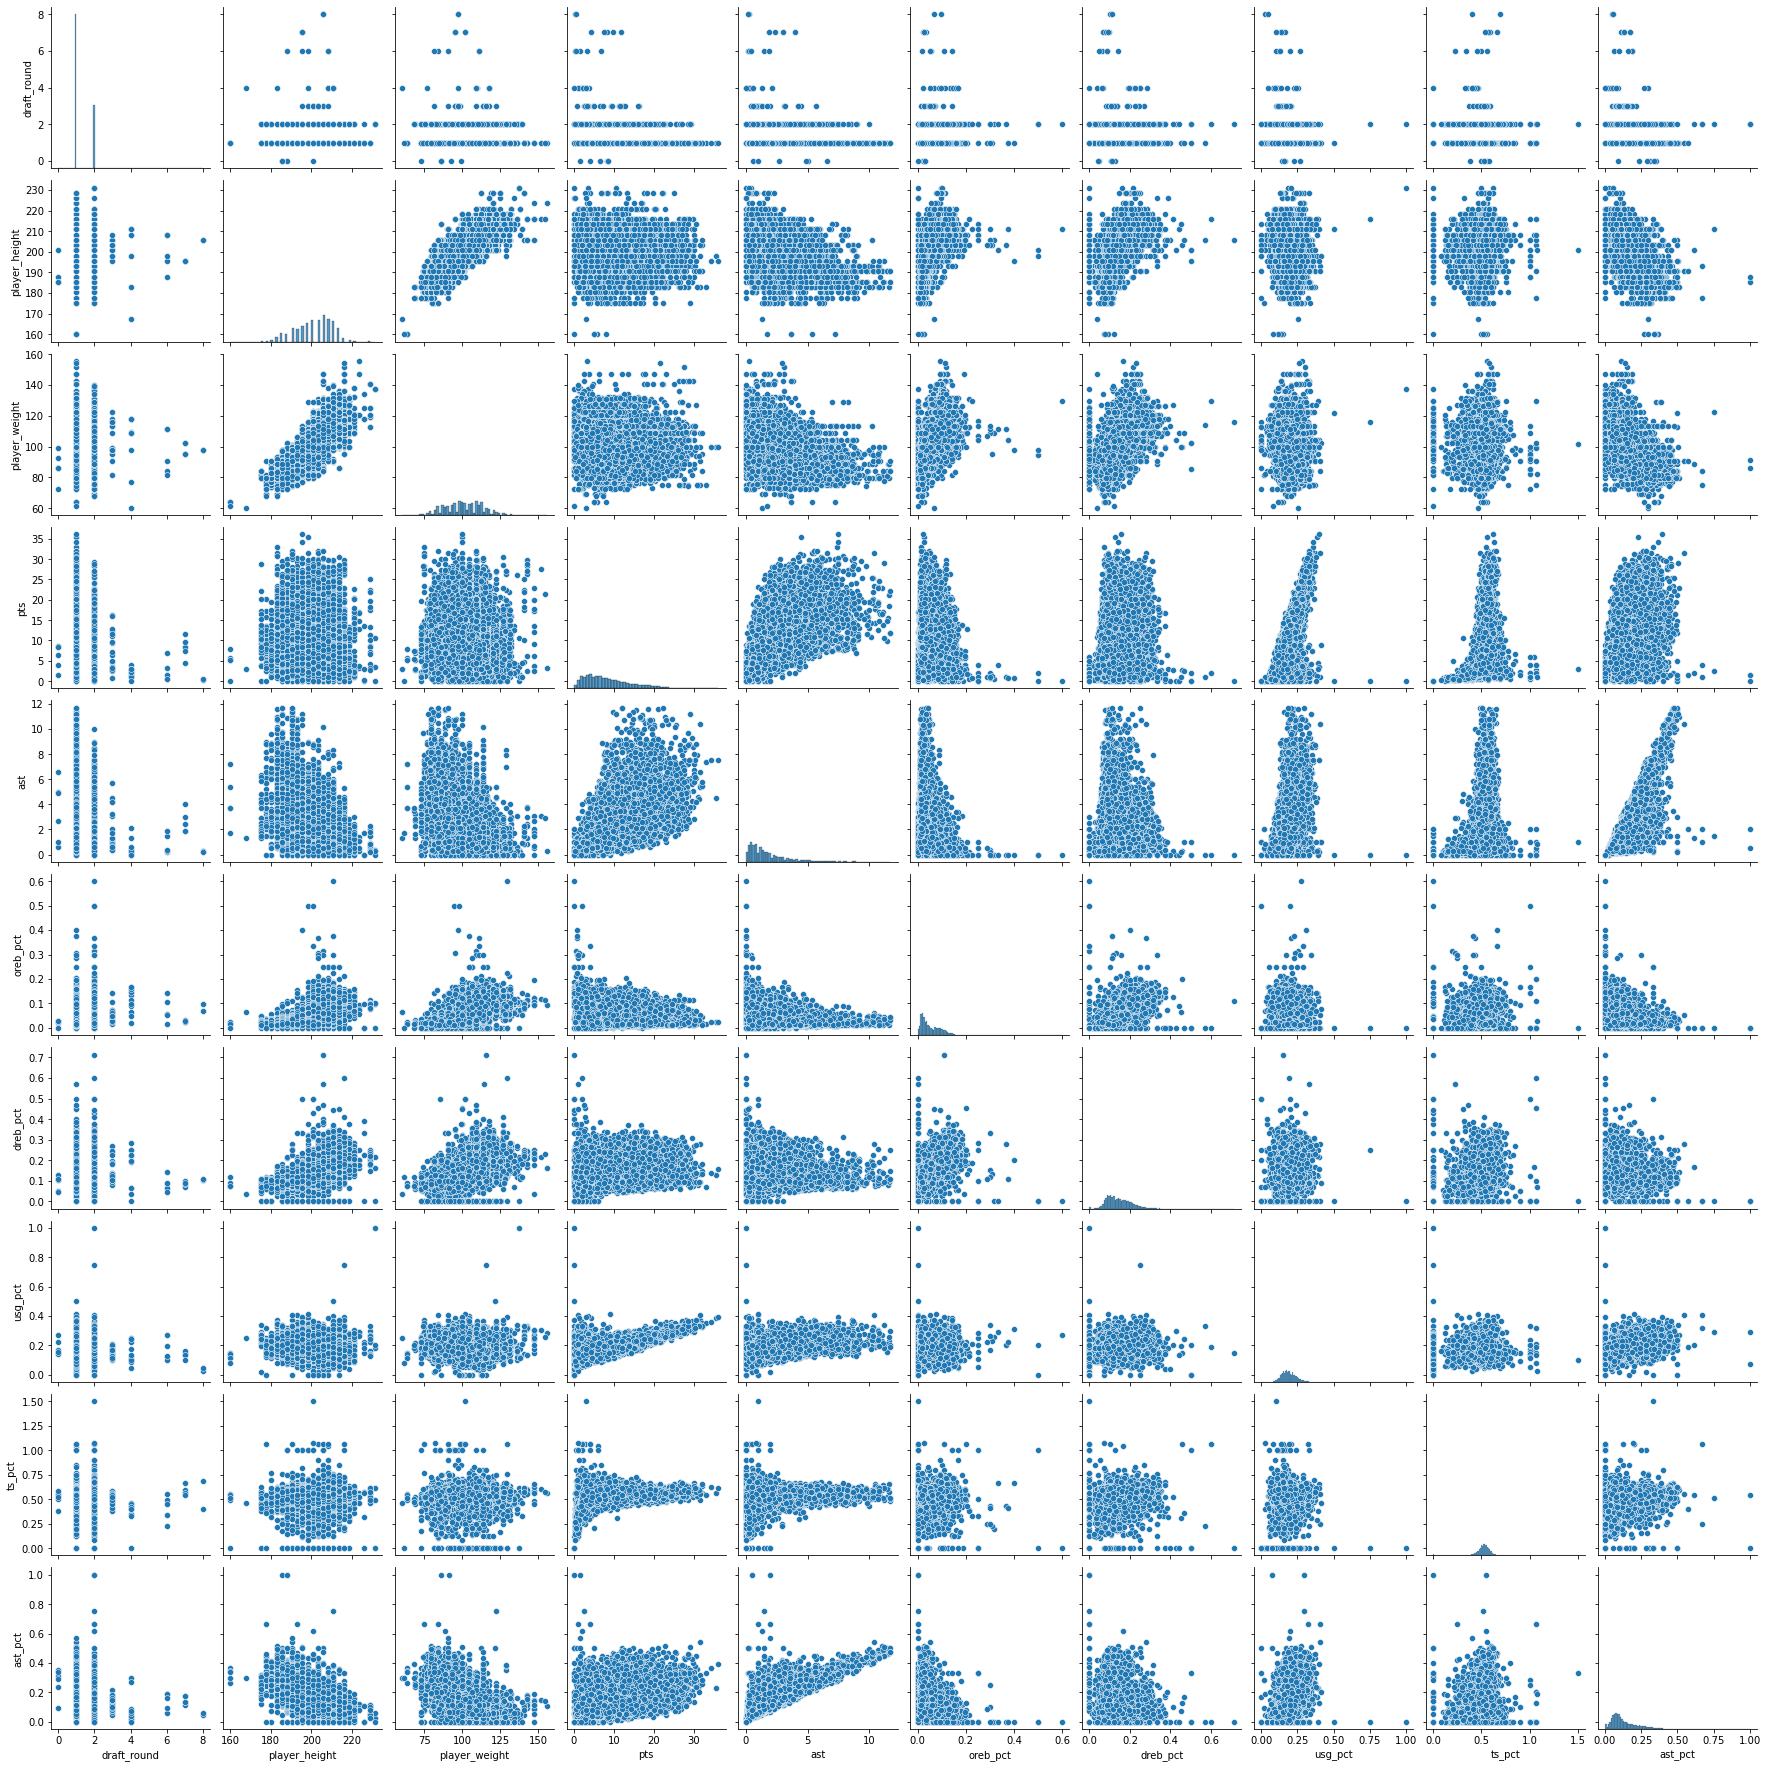

In [6]:
sns.pairplot(players_data)

In [7]:
#Using dataset #1
home = games.iloc[:,7:13]
away = games.iloc[:,14:20]
home['home'] = 1
away['home'] = 0
home = home.rename(columns={'PTS_home': 'PTS', 'FG_PCT_home': 'FG_PCT', 'FT_PCT_home': 'FT_PCT', 'FG3_PCT_home': 'FG3_PCT', 'AST_home': 'AST', 'REB_home': 'REB'})
away = away.rename(columns={'PTS_away': 'PTS', 'FG_PCT_away': 'FG_PCT', 'FT_PCT_away': 'FT_PCT', 'FG3_PCT_away': 'FG3_PCT', 'AST_away': 'AST', 'REB_away': 'REB'})
result = home.append(away, ignore_index=True)

#Normalize
scaler = MinMaxScaler()
result['PTS'] = scaler.fit_transform(result[['PTS']])
result['AST'] = scaler.fit_transform(result[['AST']])
result['REB'] = scaler.fit_transform(result[['REB']])

C:\Users\Raghuram\AppData\Local\Temp\ipykernel_15884\960497775.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = home.append(away, ignore_index=True)


<AxesSubplot:>

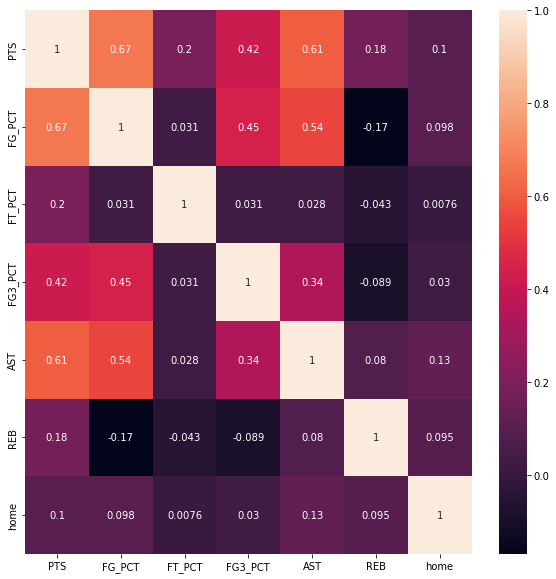

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(result.corr(), annot=True)

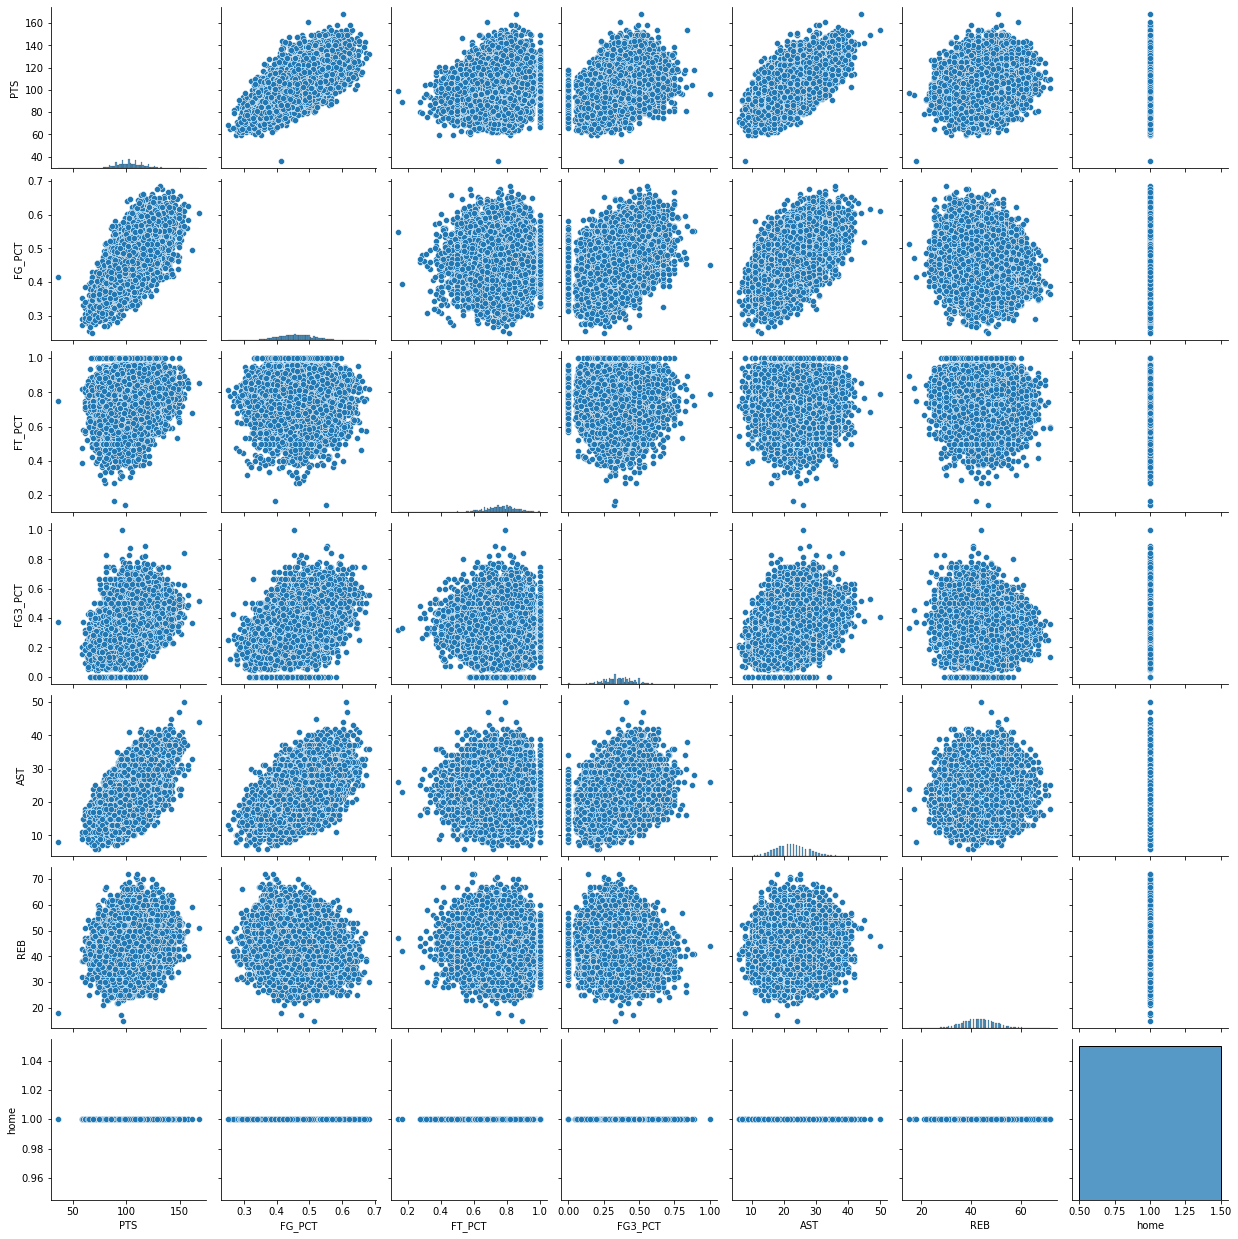

In [9]:
sns.pairplot(home)

In [3]:
players_df = pd.read_csv ("./data/all_seasons.csv")
players_df = players_df.drop(players_df[players_df.draft_round == 'Undrafted'].index)#Remove undrafted
players_df['draft_round'] = pd.to_numeric(players_df['draft_round'])
players_df

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12297,12297,Marquese Chriss,DAL,24.0,205.74,108.862080,Washington,USA,2016,1,...,4.5,3.0,0.5,-2.1,0.096,0.197,0.205,0.518,0.079,2021-22
12299,12299,Marko Simonovic,CHI,22.0,210.82,99.790240,None,Montenegro,2020,2,...,1.9,1.1,0.0,1.2,0.122,0.119,0.247,0.428,0.000,2021-22
12300,12300,Markieff Morris,MIA,32.0,205.74,111.130040,Kansas,USA,2011,1,...,7.6,2.6,1.4,4.5,0.059,0.089,0.197,0.547,0.116,2021-22
12301,12301,Markelle Fultz,ORL,24.0,193.04,94.800728,Washington,USA,2017,1,...,10.8,2.7,5.5,-5.3,0.010,0.116,0.265,0.517,0.448,2021-22


#### Original Regression Models with no Optimization

In [4]:
# Linear Regression Predicting Net Rating
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split the dataset into training and testing sets
X = players_df[["age", "player_height", "player_weight", "pts", "reb", "ast","oreb_pct","dreb_pct","usg_pct","ts_pct","ast_pct"]]
y = players_df["net_rating"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit the linear regression model to the training data
reg_model = LinearRegression().fit(X_train, y_train)

# Use the model to make predictions on the testing data
y_pred = reg_model.predict(X_test)

# Calculate the model's performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 85.07
R-squared: 0.17


In [35]:
# Random Forest Regression Predicting Net Rating
from sklearn.ensemble import RandomForestRegressor

# Fit a random forest regression model to the training data
rf_model = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)

# Use the model to make predictions on the testing data
y_pred = rf_model.predict(X_test)

# Calculate the model's performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 85.27
R-squared: -0.00


In [36]:
# Support Vector Regression Predicting Net Rating
from sklearn.svm import SVR

# Fit a support vector regression model to the training data
svr_model = SVR(kernel='rbf', C=100, gamma=0.1).fit(X_train, y_train)

# Use the model to make predictions on the testing data
y_pred = svr_model.predict(X_test)

# Calculate the model's performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 110.44
R-squared: -0.30


In [37]:
# Gradient Boosting Regression Predicting Net Rating
from sklearn.ensemble import GradientBoostingRegressor

# Fit a gradient boosting regression model to the training data
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42).fit(X_train, y_train)

# Use the model to make predictions on the testing data
y_pred = gb_model.predict(X_test)

# Calculate the model's performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 80.50
R-squared: 0.06


#### Optimizing Model via Scaling and Normalizing Data

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Split the dataset into training and testing sets
X = players_df[["age", "player_height", "player_weight", "pts", "reb", "ast","oreb_pct","dreb_pct","usg_pct","ts_pct","ast_pct"]]
y = players_df["net_rating"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Scale and normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit the linear regression model to the training data
reg_model = LinearRegression().fit(X_train, y_train)

# Use the model to make predictions on the testing data
y_pred = reg_model.predict(X_test)

# Calculate the model's performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 88.90
R-squared: 0.22


In [24]:
# Random Forest Regression Predicting Net Rating
from sklearn.ensemble import RandomForestRegressor

# Fit a random forest regression model to the training data
rf_model = RandomForestRegressor(n_estimators=100, random_state=40).fit(X_train, y_train)

# Use the model to make predictions on the testing data
y_pred = rf_model.predict(X_test)

# Calculate the model's performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 89.76
R-squared: 0.21


In [40]:
# Support Vector Regression Predicting Net Rating
from sklearn.svm import SVR

# Fit a support vector regression model to the training data
svr_model = SVR(kernel='rbf', C=100, gamma=0.1).fit(X_train, y_train)

# Use the model to make predictions on the testing data
y_pred = svr_model.predict(X_test)

# Calculate the model's performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 95.36
R-squared: 0.28


In [41]:
# Gradient Boosting Regression Predicting Net Rating
from sklearn.ensemble import GradientBoostingRegressor

# Fit a gradient boosting regression model to the training data
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42).fit(X_train, y_train)

# Use the model to make predictions on the testing data
y_pred = gb_model.predict(X_test)

# Calculate the model's performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 93.93
R-squared: 0.29


#### Optimizing models with Ensembling

In [48]:
# Ensemble the three models
y_pred_rf = rf_model.predict(X_test)
y_pred_gb = gb_model.predict(X_test)
y_pred_svr = svr_model.predict(X_test)
y_pred_ensemble = (y_pred_rf + y_pred_gb + y_pred_svr) / 3

# Calculate the ensemble model's performance metrics
mse = mean_squared_error(y_test, y_pred_ensemble)
r2 = r2_score(y_test, y_pred_ensemble)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 90.08
R-squared: 0.32


#### Modeling by Cleaning Outliers

In [55]:
players_df

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12297,12297,Marquese Chriss,DAL,24.0,205.74,108.862080,Washington,USA,2016,1,...,4.5,3.0,0.5,-2.1,0.096,0.197,0.205,0.518,0.079,2021-22
12299,12299,Marko Simonovic,CHI,22.0,210.82,99.790240,None,Montenegro,2020,2,...,1.9,1.1,0.0,1.2,0.122,0.119,0.247,0.428,0.000,2021-22
12300,12300,Markieff Morris,MIA,32.0,205.74,111.130040,Kansas,USA,2011,1,...,7.6,2.6,1.4,4.5,0.059,0.089,0.197,0.547,0.116,2021-22
12301,12301,Markelle Fultz,ORL,24.0,193.04,94.800728,Washington,USA,2017,1,...,10.8,2.7,5.5,-5.3,0.010,0.116,0.265,0.517,0.448,2021-22


In [59]:
from scipy import stats

# select only numerical columns
numerical_cols = players_df.select_dtypes(include=np.number).columns.tolist()

# calculate z-scores on numerical columns
z_scores = stats.zscore(players_df[numerical_cols])

# set threshold and mask outliers
threshold = 3
mask = (z_scores.abs() > threshold).any(axis=1)

# filter the dataframe to exclude outliers
df = players_df[~mask]

df

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97
5,5,Eddie Johnson,HOU,38.0,200.66,97.522280,Illinois,USA,1981,2,...,8.2,2.7,1.0,4.1,0.034,0.126,0.220,0.541,0.102,1996-97
6,6,Eddie Jones,LAL,25.0,198.12,86.182480,Temple,USA,1994,1,...,17.2,4.1,3.4,4.1,0.035,0.091,0.209,0.559,0.149,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12296,12296,Marvin Bagley III,DET,23.0,210.82,106.594120,Duke,USA,2018,1,...,11.3,7.0,0.8,-5.6,0.084,0.200,0.191,0.551,0.049,2021-22
12297,12297,Marquese Chriss,DAL,24.0,205.74,108.862080,Washington,USA,2016,1,...,4.5,3.0,0.5,-2.1,0.096,0.197,0.205,0.518,0.079,2021-22
12299,12299,Marko Simonovic,CHI,22.0,210.82,99.790240,None,Montenegro,2020,2,...,1.9,1.1,0.0,1.2,0.122,0.119,0.247,0.428,0.000,2021-22
12300,12300,Markieff Morris,MIA,32.0,205.74,111.130040,Kansas,USA,2011,1,...,7.6,2.6,1.4,4.5,0.059,0.089,0.197,0.547,0.116,2021-22


In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Split the dataset into training and testing sets
X = df[["age", "player_height", "player_weight", "pts", "reb", "ast","oreb_pct","dreb_pct","usg_pct","ts_pct","ast_pct"]]
y = df["net_rating"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Scale and normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit the linear regression model to the training data
reg_model = LinearRegression().fit(X_train, y_train)

# Use the model to make predictions on the testing data
y_pred = reg_model.predict(X_test)

# Calculate the model's performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 40.24
R-squared: 0.19


In [61]:
# Random Forest Regression Predicting Net Rating
from sklearn.ensemble import RandomForestRegressor

# Fit a random forest regression model to the training data
rf_model = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)

# Use the model to make predictions on the testing data
y_pred = rf_model.predict(X_test)

# Calculate the model's performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 39.71
R-squared: 0.20


In [62]:
# Support Vector Regression Predicting Net Rating
from sklearn.svm import SVR

# Fit a support vector regression model to the training data
svr_model = SVR(kernel='rbf', C=100, gamma=0.1).fit(X_train, y_train)

# Use the model to make predictions on the testing data
y_pred = svr_model.predict(X_test)

# Calculate the model's performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 42.08
R-squared: 0.15


In [63]:
# Gradient Boosting Regression Predicting Net Rating
from sklearn.ensemble import GradientBoostingRegressor

# Fit a gradient boosting regression model to the training data
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42).fit(X_train, y_train)

# Use the model to make predictions on the testing data
y_pred = gb_model.predict(X_test)

# Calculate the model's performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 39.41
R-squared: 0.21


#### AUTO ML

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import autosklearn.regression

# Load the data
X = players_df[["age", "player_height", "player_weight", "pts", "reb", "ast",
                "oreb_pct", "dreb_pct", "usg_pct", "ts_pct", "ast_pct"]]
y = players_df["net_rating"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale and normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the Auto-sklearn regression model
model = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=360, # 5 minutes
    per_run_time_limit=180, # 3 minutes
    n_jobs=-1,
    scoring_function=autosklearn.metrics.r2,
    include_estimators=["random_forest", "extra_trees", "gradient_boosting"],
    exclude_estimators=None,
    include_preprocessors=["no_preprocessing", "polynomial"],
    exclude_preprocessors=None,
    initial_configurations_via_metalearning=25,
    seed=42
)

# Fit the model to the training data
model.fit(X_train, y_train)

# Evaluate the model on the testing data
y_pred = model.predict(X_test)
r2 = autosklearn.metrics.r2(y_test, y_pred)

# Print the R-squared score
print(f"R-squared: {r2:.3f}")

    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "C:\Users\Raghuram\AppData\Local\Temp\pip-install-85n0atwy\auto-sklearn_1877dee73d324109a3c16b74c8eeb636\setup.py", line 9, in <module>
        raise ValueError(
    ValueError: Detected unsupported operating system: win32. Please check the compability information of auto-sklearn: https://automl.github.io/auto-sklearn/master/installation.html#windows-osx-compatibility
    ----------------------------------------
    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\Raghuram\anaconda3\python.exe' -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Raghuram\\AppData\\Local\\Temp\\pip-install-85n0atwy\\auto-sklearn_78416029e69e493fb92aaa2000eefe1a\\setup.py'"'"'; __file__='"'"'C:\\Users\\Raghuram\\AppData\\Local\\Temp\\pip-install-85n0atwy\\auto-sklearn_78416029e69e493fb92aaa2000eefe1a\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__)

ModuleNotFoundError: No module named 'autosklearn'

  copying autosklearn\metalearning\files\recall_macro_binary.classification_sparse\description.txt -> build\lib.win-amd64-3.9\autosklearn\metalearning\files\recall_macro_binary.classification_sparse
  copying autosklearn\metalearning\files\recall_macro_binary.classification_sparse\feature_costs.arff -> build\lib.win-amd64-3.9\autosklearn\metalearning\files\recall_macro_binary.classification_sparse
  copying autosklearn\metalearning\files\recall_macro_binary.classification_sparse\feature_runstatus.arff -> build\lib.win-amd64-3.9\autosklearn\metalearning\files\recall_macro_binary.classification_sparse
  copying autosklearn\metalearning\files\recall_macro_binary.classification_sparse\feature_values.arff -> build\lib.win-amd64-3.9\autosklearn\metalearning\files\recall_macro_binary.classification_sparse
  copying autosklearn\metalearning\files\recall_macro_binary.classification_sparse\readme.txt -> build\lib.win-amd64-3.9\autosklearn\metalearning\files\recall_macro_binary.classification_spa

    copying sklearn\gaussian_process\regression_models.py -> build\lib.win-amd64-3.9\sklearn\gaussian_process
    copying sklearn\gaussian_process\__init__.py -> build\lib.win-amd64-3.9\sklearn\gaussian_process
    creating build\lib.win-amd64-3.9\sklearn\gaussian_process\tests
    copying sklearn\gaussian_process\tests\test_gaussian_process.py -> build\lib.win-amd64-3.9\sklearn\gaussian_process/tests
    copying sklearn\gaussian_process\tests\test_gpc.py -> build\lib.win-amd64-3.9\sklearn\gaussian_process/tests
    copying sklearn\gaussian_process\tests\test_gpr.py -> build\lib.win-amd64-3.9\sklearn\gaussian_process/tests
    copying sklearn\gaussian_process\tests\test_kernels.py -> build\lib.win-amd64-3.9\sklearn\gaussian_process/tests
    copying sklearn\gaussian_process\tests\__init__.py -> build\lib.win-amd64-3.9\sklearn\gaussian_process/tests
    creating build\lib.win-amd64-3.9\sklearn\mixture
    copying sklearn\mixture\base.py -> build\lib.win-amd64-3.9\sklearn\mixture
    cop

In [13]:
# Ridge Regressiom
from sklearn.linear_model import Ridge

# Load the data
X = players_df[["age", "player_height", "player_weight", "pts", "reb", "ast",
                "oreb_pct", "dreb_pct", "usg_pct", "ts_pct", "ast_pct"]]
y = players_df["net_rating"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale and normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Instantiate the Ridge regression model with default hyperparameters
ridge = Ridge()

# Train the model on the training data
ridge.fit(X_train, y_train)

# Predict the target variable for the testing data
y_pred = ridge.predict(X_test)

# Evaluate the performance of the model using mean squared error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error:", mse)
print("R-squared:", r2)


Mean squared error: 88.11941855582133
R-squared: 0.17612208160738863


In [12]:
# Ridge with Grid Search CV
# Import the necessary libraries
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Load the data
X = players_df[["age", "player_height", "player_weight", "pts", "reb", "ast",
                "oreb_pct", "dreb_pct", "usg_pct", "ts_pct", "ast_pct"]]
y = players_df["net_rating"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale and normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Set up a grid of hyperparameters to search over
param_grid = {'alpha': [0.1, 1, 10, 100]}

# Instantiate a Ridge regression model
ridge = Ridge()

# Perform cross-validation to find the best hyperparameters
grid_search = GridSearchCV(ridge, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Train the model on the training data with the best hyperparameters
ridge = grid_search.best_estimator_
ridge.fit(X_train, y_train)

# Predict the target variable for the testing data
y_pred = ridge.predict(X_test)

# Evaluate the performance of the model using mean squared error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error:", mse)
print("R-squared:", r2)


Mean squared error: 87.9522592111782
R-squared: 0.17768494817143887


In [14]:
# Lasso With Grid Search CV
# Import the necessary libraries
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the data
X = players_df[["age", "player_height", "player_weight", "pts", "reb", "ast",
                "oreb_pct", "dreb_pct", "usg_pct", "ts_pct", "ast_pct"]]
y = players_df["net_rating"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale and normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Set up a grid of hyperparameters to search over
param_grid = {'alpha': [0.1, 1, 10, 100]}

# Instantiate a Lasso regression model
lasso = Lasso()

# Perform cross-validation to find the best hyperparameters
grid_search = GridSearchCV(lasso, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Train the model on the training data with the best hyperparameters
lasso = grid_search.best_estimator_
lasso.fit(X_train, y_train)

# Predict the target variable for the testing data
y_pred = lasso.predict(X_test)

# Evaluate the performance of the model using mean squared error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error:", mse)
print("R-squared:", r2)

Mean squared error: 87.70731797258524
R-squared: 0.1799750413323764


In [18]:
#Huber Regression
# Import the necessary libraries
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
X = players_df[["age", "player_height", "player_weight", "pts", "reb", "ast",
                "oreb_pct", "dreb_pct", "usg_pct", "ts_pct", "ast_pct"]]
y = players_df["net_rating"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale and normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Instantiate the Huber regression model with default hyperparameters
huber = HuberRegressor()
# Train the model on the training data
huber.fit(X_train, y_train)

# Predict the target variable for the testing data
y_pred = huber.predict(X_test)

# Evaluate the performance of the model using mean squared error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error:", mse)
print("R-squared:", r2)

Mean squared error: 88.10960234552405
R-squared: 0.17621385886873187


In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Set up the parameter grid to search over
param_grid = {'n_estimators': [100, 200, 500],
              'max_depth': [None, 10, 20],
              'max_features': ['auto', 'sqrt']}

# Instantiate a random forest regression model
rf_model = RandomForestRegressor(random_state=42)

# Create a GridSearchCV object to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Best GridSearchCV Model
y_pred = grid_search.predict(X_test)

# Calculate the model's performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 89.61
R-squared: 0.21


In [13]:
# Random Forest Model Function
def predict_net_rating(age, player_height, player_weight, pts, reb, ast, oreb_pct, dreb_pct, usg_pct, ts_pct, ast_pct):
    # Load the data
    X = players_df[["age", "player_height", "player_weight", "pts", "reb", "ast",
                    "oreb_pct", "dreb_pct", "usg_pct", "ts_pct", "ast_pct"]]
    y = players_df["net_rating"]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale and normalize the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Set up the parameter grid to search over
    param_grid = {'n_estimators': [100, 200, 500],
                  'max_depth': [None, 10, 20],
                  'max_features': ['auto', 'sqrt']}

    # Instantiate a random forest regression model
    rf_model = RandomForestRegressor(random_state=42)

    # Create a GridSearchCV object to find the best hyperparameters
    grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)

    # Fit the GridSearchCV object to the training data
    grid_search.fit(X_train, y_train)

    # Make a prediction using the trained model
    input_data = [[age, player_height, player_weight, pts, reb, ast, oreb_pct, dreb_pct, usg_pct, ts_pct, ast_pct]]
    input_data_scaled = scaler.transform(input_data)
    net_rating = grid_search.predict(input_data_scaled)[0]

    return net_rating

In [14]:
from flask import Flask, render_template, request

app = Flask(__name__)

@app.route("/")
def index():
    return render_template("index.html")

@app.route("/predict", methods=["POST"])
def predict():
    # Get input values from form
    age = request.form.get("age")
    player_height = request.form.get("player_height")
    player_weight = request.form.get("player_weight")
    pts = request.form.get("pts")
    reb = request.form.get("reb")
    ast = request.form.get("ast")
    oreb_pct = request.form.get("oreb_pct")
    dreb_pct = request.form.get("dreb_pct")
    usg_pct = request.form.get("usg_pct")
    ts_pct = request.form.get("ts_pct")
    ast_pct = request.form.get("ast_pct")

    # Use the model to make a prediction
    prediction = predict_net_rating(age, player_height, player_weight, pts, reb, ast, oreb_pct, dreb_pct, usg_pct, ts_pct, ast_pct)

    # Render the prediction in the HTML template
    return render_template("index.html", prediction=prediction)

if __name__ == "__main__":
    app.run(debug=True)


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\Raghuram\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3377: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
